<a href="https://www.kaggle.com/code/lalit7881/causes-of-death-analysis?scriptVersionId=295793977" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deaths-and-causes/deaths_and_causes_synthetic.csv


In [2]:
df = pd.read_csv("/kaggle/input/deaths-and-causes/deaths_and_causes_synthetic.csv")

In [3]:
df.head()

,Year,Country,Gender,Age_Group,Cause_of_Death,Number_of_Deaths,Mortality_Rate_per_1000
0,2022,India,Male,0-14,Natural Disasters,73272,2.79
1,2025,Germany,Female,0-14,Homicide,421169,0.71
2,2020,Japan,Female,30-44,Infectious Diseases,103315,0.75
3,2023,Germany,Male,30-44,Suicide,220423,11.86
4,2015,Nigeria,Female,15-29,Stroke,157810,9.50


In [4]:
df.tail()

,Year,Country,Gender,Age_Group,Cause_of_Death,Number_of_Deaths,Mortality_Rate_per_1000
255,2016,Pakistan,Male,15-29,Homicide,387404,11.33
256,2015,Japan,Female,15-29,Cardiovascular Disease,52733,8.74
257,2025,Pakistan,Female,0-14,Cancer,68972,5.16
258,2023,Brazil,Male,30-44,Suicide,472848,9.72
259,2019,China,Male,30-44,Diabetes,327145,1.52


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     260 non-null    int64  
 1   Country                  260 non-null    object 
 2   Gender                   260 non-null    object 
 3   Age_Group                260 non-null    object 
 4   Cause_of_Death           260 non-null    object 
 5   Number_of_Deaths         260 non-null    int64  
 6   Mortality_Rate_per_1000  260 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.3+ KB


In [6]:
df.describe()

,Year,Number_of_Deaths,Mortality_Rate_per_1000
count,260.000000,260.000000,260.000000
mean,2020.126923,257694.530769,5.956654
std,3.187095,149809.426503,3.418219
min,2015.000000,4275.000000,0.190000
25%,2018.000000,113526.500000,2.912500
50%,2020.000000,265817.000000,5.955000
75%,2023.000000,391843.000000,9.040000
max,2025.000000,499331.000000,12.000000


In [7]:
df.isnull().sum()

Year                       0
Country                    0
Gender                     0
Age_Group                  0
Cause_of_Death             0
Number_of_Deaths           0
Mortality_Rate_per_1000    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

Year                         int64
Country                     object
Gender                      object
Age_Group                   object
Cause_of_Death              object
Number_of_Deaths             int64
Mortality_Rate_per_1000    float64
dtype: object

In [10]:
df.shape

(260, 7)

In [11]:
df.nunique()

Year                        11
Country                     10
Gender                       2
Age_Group                    5
Cause_of_Death              11
Number_of_Deaths           260
Mortality_Rate_per_1000    239
dtype: int64

In [12]:
df.columns

Index(['Year', 'Country', 'Gender', 'Age_Group', 'Cause_of_Death',
       'Number_of_Deaths', 'Mortality_Rate_per_1000'],
      dtype='object')

## Data visualizations

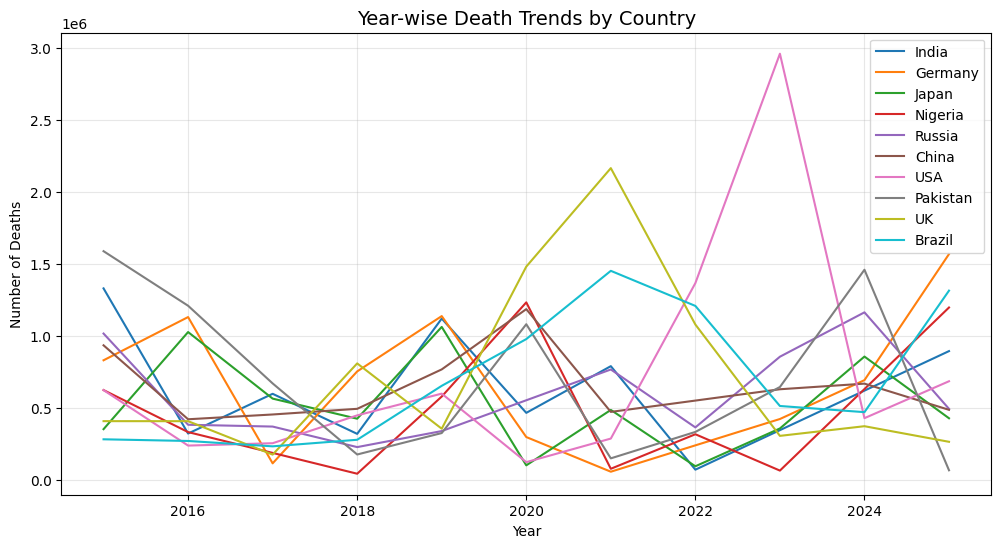

In [13]:
plt.figure(figsize=(12,6))

for country in df['Country'].unique():
    temp = df[df['Country'] == country]
    yearly = temp.groupby('Year')['Number_of_Deaths'].sum()
    plt.plot(yearly.index, yearly.values, label=country)

plt.title("Year-wise Death Trends by Country", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

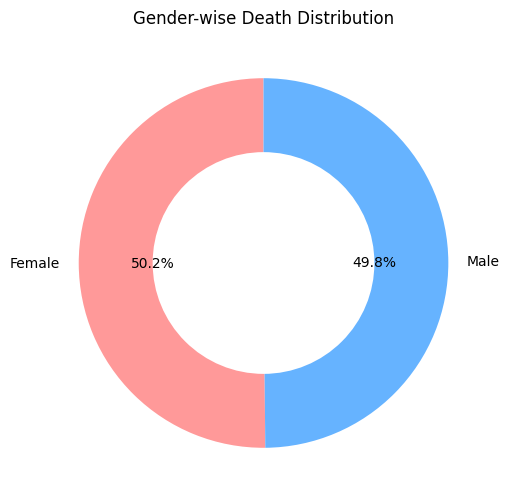

In [14]:
gender_deaths = df.groupby('Gender')['Number_of_Deaths'].sum()

plt.figure(figsize=(6,6))
plt.pie(
    gender_deaths,
    labels=gender_deaths.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999','#66b3ff','#99ff99']
)
centre_circle = plt.Circle((0,0),0.60,fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Gender-wise Death Distribution")
plt.show()


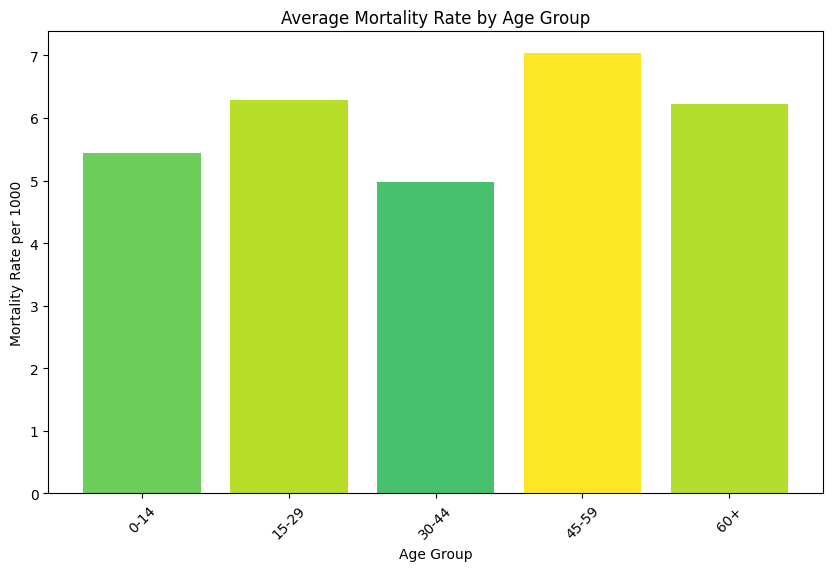

In [15]:
age_mortality = df.groupby('Age_Group')['Mortality_Rate_per_1000'].mean()

plt.figure(figsize=(10,6))
plt.bar(
    age_mortality.index,
    age_mortality.values,
    color=plt.cm.viridis(age_mortality.values / age_mortality.max())
)

plt.title("Average Mortality Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Mortality Rate per 1000")
plt.xticks(rotation=45)
plt.show()


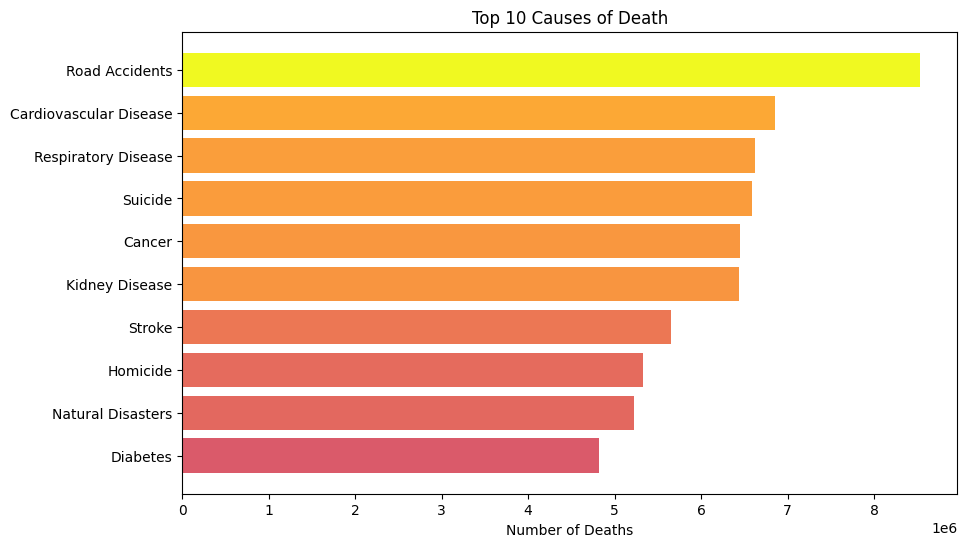

In [16]:
top_causes = (
    df.groupby('Cause_of_Death')['Number_of_Deaths']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
plt.barh(
    top_causes.index,
    top_causes.values,
    color=plt.cm.plasma(top_causes.values / top_causes.values.max())
)

plt.title("Top 10 Causes of Death")
plt.xlabel("Number of Deaths")
plt.gca().invert_yaxis()
plt.show()


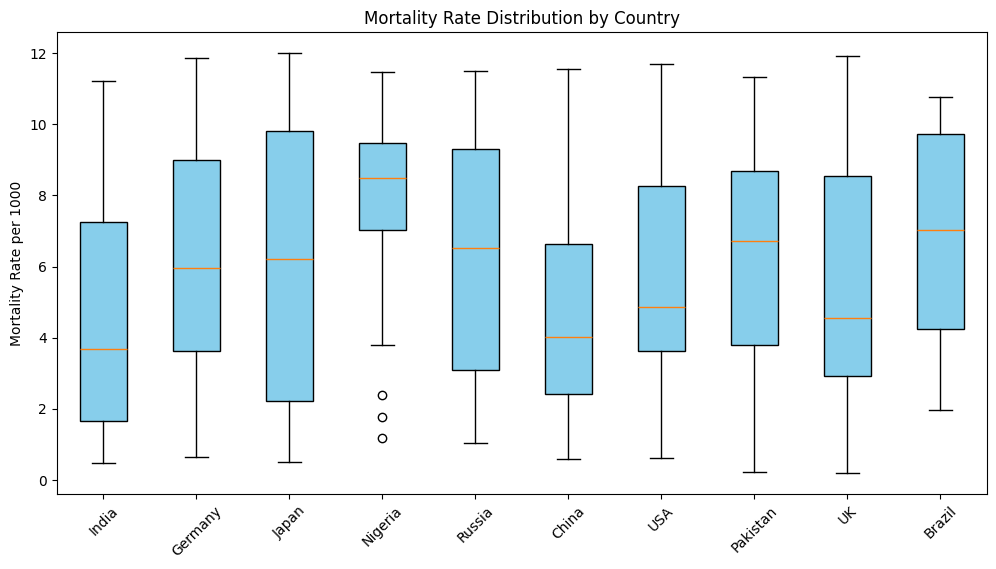

In [17]:
plt.figure(figsize=(12,6))

box = plt.boxplot(
    [df[df['Country'] == c]['Mortality_Rate_per_1000'] for c in df['Country'].unique()],
    labels=df['Country'].unique(),
    patch_artist=True
)

for patch in box['boxes']:
    patch.set_facecolor('#87CEEB')

plt.title("Mortality Rate Distribution by Country")
plt.ylabel("Mortality Rate per 1000")
plt.xticks(rotation=45)
plt.show()


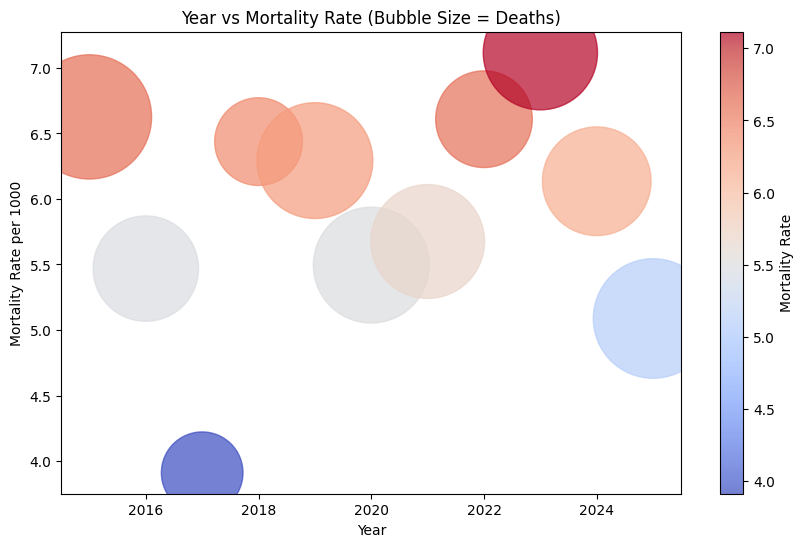

In [18]:
yearly = df.groupby('Year').agg({
    'Mortality_Rate_per_1000': 'mean',
    'Number_of_Deaths': 'sum'
}).reset_index()

plt.figure(figsize=(10,6))
plt.scatter(
    yearly['Year'],
    yearly['Mortality_Rate_per_1000'],
    s=yearly['Number_of_Deaths'] / 1000,
    c=yearly['Mortality_Rate_per_1000'],
    cmap='coolwarm',
    alpha=0.7
)

plt.colorbar(label='Mortality Rate')
plt.title("Year vs Mortality Rate (Bubble Size = Deaths)")
plt.xlabel("Year")
plt.ylabel("Mortality Rate per 1000")
plt.show()


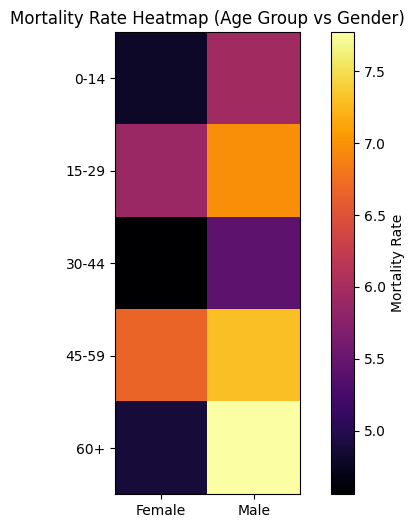

In [19]:
pivot = df.pivot_table(
    values='Mortality_Rate_per_1000',
    index='Age_Group',
    columns='Gender',
    aggfunc='mean'
)

plt.figure(figsize=(8,6))
plt.imshow(pivot, cmap='inferno')
plt.colorbar(label='Mortality Rate')

plt.xticks(range(len(pivot.columns)), pivot.columns)
plt.yticks(range(len(pivot.index)), pivot.index)
plt.title("Mortality Rate Heatmap (Age Group vs Gender)")
plt.show()


## Feature engg

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [21]:
data = df.copy()

cat_cols = ['Country', 'Gender', 'Age_Group', 'Cause_of_Death']
le = LabelEncoder()

for col in cat_cols:
    data[col] = le.fit_transform(data[col])


In [22]:
X = data[
    ['Year', 'Country', 'Gender', 'Age_Group', 'Cause_of_Death', 'Number_of_Deaths']
]

y = data['Mortality_Rate_per_1000']


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(),
    "KNN Regressor": KNeighborsRegressor()
}


In [25]:
accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    accuracy_scores[name] = r2 * 100


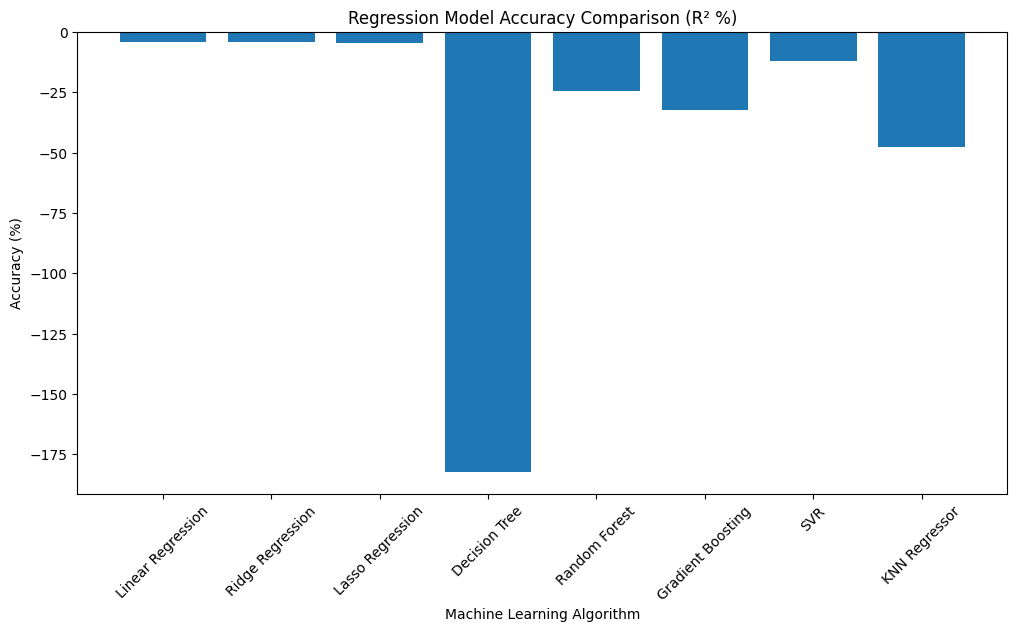

In [26]:
plt.figure(figsize=(12,6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.title("Regression Model Accuracy Comparison (R² %)")
plt.xlabel("Machine Learning Algorithm")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)
plt.show()
